# Apresentação, introdução, iniciação ao problema...

---

Esse é literalmente o banco de dados ou competição para quem está iniciando no mundo de aprendizado de máquina (podemos esclarecer eu), mais famoso até que o **House Prices**.

## Objetivo

Criar um modelo de aprendizado de máquina ou estatística para predizer se determinado passageiro, a partir de suas características, vai sobreviver ou não ao desastre do Titanic, isto é, uma variável binária com as classes 0 (Não, o passageiro não morreu) e 1 (Sim, o passageiro morreu).

## Variáveis utilizadas

Informações dos passageiros, como nome, idade, gênero e variáveis sócio-econômicas separadas em dados de treino e teste.

- Os dados de treino possuem 891 observações (passageiros).
- Os dados de teste possuem 418 observações (passageiros).

## Métrica 

A métrica para ser utilizada é a acurácia, ela provém da matriz de confusão (ver imagem abaixo).


![](https://miro.medium.com/max/1400/1*s7VB26Cfo1LdVZcLou-e0g.png "Logo Principal da Eagle Tecnologia")
**Nota**: Retirado de https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c

A matriz de confusão é uma tabela onde comparamos os dados que realmente são verdadeiros e o que nosso modelo preveu para esses dados, dando a possibilidade de verificar o quanto nosso modelo preveu corretamente (acurácia) assim como outras métricas.

O cálculo da acurácia é dado por

$$ \mbox{Acurácia}  = \frac{\mbox{Verdadeiros Positivos (VP)} + \mbox{Verdadeiro Negativo (VN)}}{\mbox{Total}} $$

Nos dizendo os acertos, de qualquer classe (nesse caso Sim e Não), que tivemos em relação ao total.

Assim como há outras métricas que podemos retirar da matriz de confusão, ver este [link](https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c).

Para mais detalhes da diferença entre acurácia e precisão, ver este [link](https://blog.idwall.co/o-que-e-acuracia/).

# Bibliotecas utilizadas

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-muted")
%matplotlib inline

# Lendo os dados de treino e teste

---

In [2]:
treino = pd.read_csv("train.csv")
teste = pd.read_csv("test.csv")

# Explorando os dados 

---

In [3]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---

## Dicionário das variáveis

Podemos observar que temos as seguinte estrutura de variáveis no banco:

In [4]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---

O que significa cada uma, segundo o [Kaggle](https://www.kaggle.com/c/titanic/data) é:

1. **PassengerId**: Um ID para identificar cada passageiro;
2. **Survived**: Se ele sobreviveu (0 = Não, 1 = Sim) - Qualitativa;
3. **Pclass**: Ticket que indica qual classe o passageiro estava (1 = 1st, 2 = 2nd, 3 = 3rd) - Qualitativa;
4. **Name**: Nome - Qualitativa;
5. **Sex**: Sexo - Qualitativa;
6. **Age**: Idade - Quantitativa;
7. **SibSp**: Nº de irmãos / cônjuges a bordo do Titanic - Quantitativa;
8. **Parch**: Nº de pais / filhos a bordo do Titanic - Quantitativa;
9. **Ticket**: Nº do ticket - Qualitativa;
10. **Fare**: Tarifa do passageiro - Quantitativa;
11. **Cabin**: Número da cabine - Qualitativa;
12. **Embarked**: Porto em que o passageiro embarcou - Qualitativa.

## Explorando a variável independente, target

Podemos verificar, inicialmente, qual a proporção de passageiros que sobreviveram ou não.

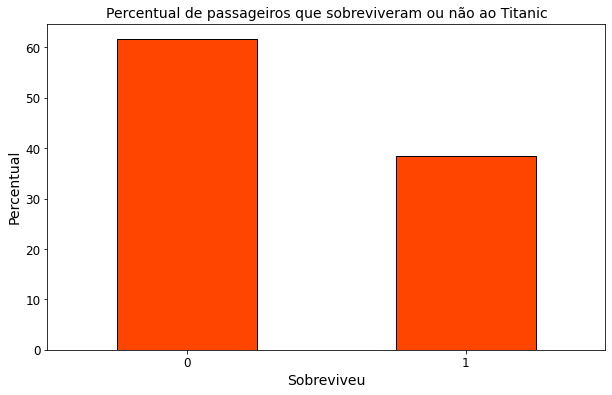

In [5]:
plt.figure(figsize = [10, 6])

treino["Survived"].value_counts(normalize = True).mul(100).plot(kind = "bar", color = "orangered", edgecolor = "black")
plt.title("Percentual de passageiros que sobreviveram ou não ao Titanic", fontsize = 14, color = "black")
plt.xlabel("Sobreviveu", fontsize = 14, color = "black")
plt.ylabel("Percentual", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)
plt.show()

Temos que, aproximadamente, 60% dos passageiros não sobreviveram e, consequentemente, aproximadamente 40\% sobreviveram. 

**Portanto, podemos concluir que**: nossos dados de treino não está balanceado (50/50) mas está próxima disso, possibilitando o uso da regressão logística como método de previsão para este caso. 

Para sabermos o número específico de pessoas que sobreviveram ou não, assim como o percentual, podemos mostrar a partir da seguinte tabela:

In [6]:
pd.concat([treino["Survived"].value_counts(), 
                treino["Survived"].value_counts(normalize = True).mul(100).round(2)],axis = 1, keys = ("Quantidade", "Percentual"))

,Quantidade,Percentual
0,549,61.62
1,342,38.38


---

## Explorando as variáveis explicativas (Univariada)

### Qualitativas

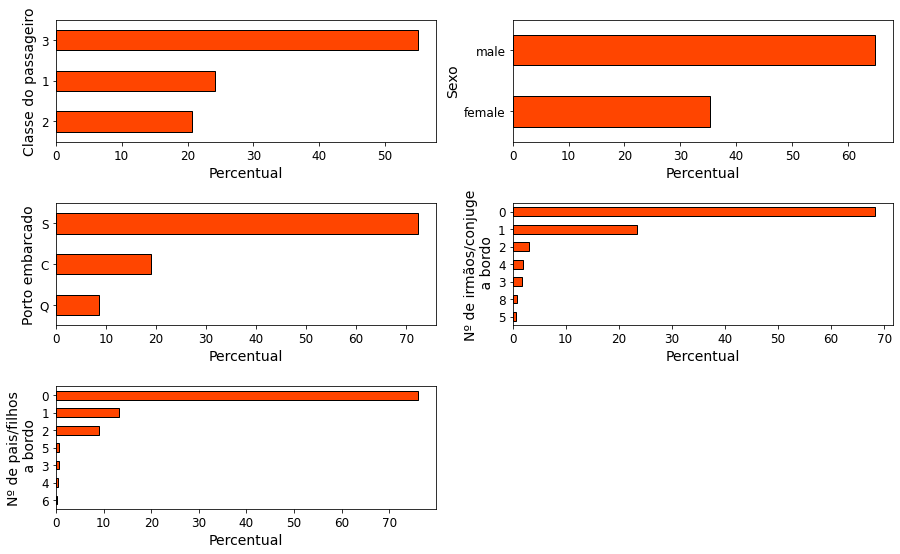

In [7]:
plt.figure(figsize = [15, 9])

#---

plt.subplot(3, 2, 1)

treino["Pclass"].value_counts(normalize = True, ascending = True).mul(100).plot(kind = "barh", color = "orangered", edgecolor = "black")
plt.xlabel("Percentual", fontsize = 14, color = "black")
plt.ylabel("Classe do passageiro", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)

plt.subplot(3, 2, 2)

treino["Sex"].value_counts(normalize = True, ascending = True).mul(100).plot(kind = "barh", color = "orangered", edgecolor = "black")
plt.xlabel("Percentual", fontsize = 14, color = "black")
plt.ylabel("Sexo", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)

plt.subplot(3, 2, 3)

treino["Embarked"].value_counts(normalize = True, ascending = True).mul(100).plot(kind = "barh", color = "orangered", edgecolor = "black")
plt.xlabel("Percentual", fontsize = 14, color = "black")
plt.ylabel("Porto embarcado", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)

plt.subplot(3, 2, 4)

treino["SibSp"].value_counts(normalize = True, ascending = True).mul(100).plot(kind = "barh", color = "orangered", edgecolor = "black")
plt.xlabel("Percentual", fontsize = 14, color = "black")
plt.ylabel("Nº de irmãos/conjuge\n a bordo", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)

plt.subplot(3, 2, 5)

treino["Parch"].value_counts(normalize = True, ascending = True).mul(100).plot(kind = "barh", color = "orangered", edgecolor = "black")
plt.xlabel("Percentual", fontsize = 14, color = "black")
plt.ylabel("Nº de pais/filhos\n a bordo", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)

        

#---

plt.subplots_adjust(hspace = 0.5)
plt.show()

---

**A partir dos gráficos acima podemos notar que:**

1. A maioria dos passageiros eram da 3ª classe. O Kaggle informa que essa é uma variável proxy sócio-econômica, também indicando que a pessoa tinha um poder aquisitivo mais baixo que as demais;

2. A maioria dos passageiros no Titanic era do sexo masculino;

3. O porto S foi o que mais embarcou pessoas para o Titanic;

4. Grande parte das pessoas estavam viajando sem acompanhantes familiares.

### Quantitativas

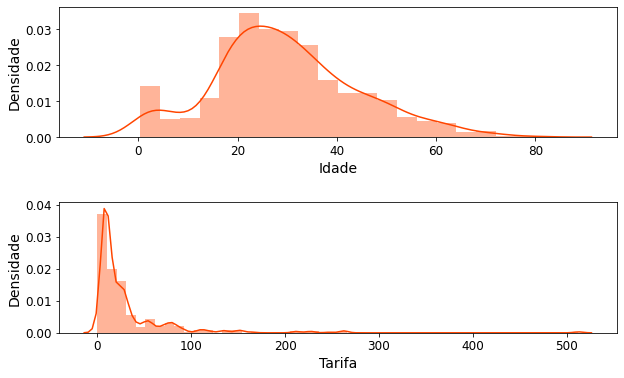

In [8]:
plt.figure(figsize = [10, 6])

#---

plt.subplot(2, 1, 1)

sns.distplot(treino["Age"], color = "orangered")
plt.xlabel("Idade", fontsize = 14, color = "black")
plt.ylabel("Densidade", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")

plt.subplot(2, 1, 2)

sns.distplot(treino["Fare"], color = "orangered")
plt.xlabel("Tarifa", fontsize = 14, color = "black")
plt.ylabel("Densidade", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")


plt.subplots_adjust(hspace = 0.5)
plt.show()

**Podemos notar que:**

1. A idade possui valores mais frequentes na faixa dos 20 anos, logo, muitos eram passageiros jovens;

2. Grande parte dos passageiros pagaram tarifas baixas, podendo estar relacionado com o que vimos nos primeiros gráficos, que muitos eram da 3ª classe.

### Outras variáveis qualitativas (Name, Ticket e Cabin)

Aqui já fica de sugestão para mim (e para você verificar se há algum padrão nestas variáveis). Estas variáveis, devido ser a baseline, não irão para o modelo.

In [9]:
treino[["Name", "Ticket", "Cabin"]].head()

,Name,Ticket,Cabin
0,"Braund, Mr. Owen Harris",A/5 21171,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123
4,"Allen, Mr. William Henry",373450,NaN


## Explorando a relação entre variáveis (bivariada)

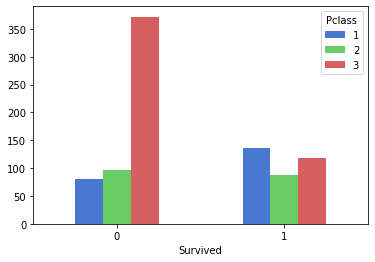

In [10]:
#--- Sobreviveu x Classe

treino[["Survived", "Pclass"]].reset_index().groupby(["Survived", "Pclass"], as_index = False).size().unstack().plot.bar()
plt.xticks(rotation = 0)
plt.show()

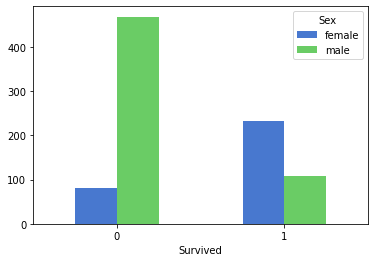

In [11]:
#--- Sobreviveu x Sexo

treino[["Survived", "Sex"]].reset_index().groupby(["Survived", "Sex"], as_index = False).size().unstack().plot.bar()
plt.xticks(rotation = 0)
plt.show()

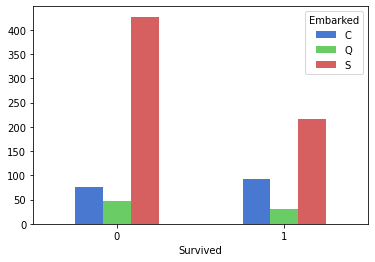

In [12]:
#--- Sobreviveu x Porto embarcado

treino[["Survived", "Embarked"]].reset_index().groupby(["Survived", "Embarked"], as_index = False).size().unstack().plot.bar()
plt.xticks(rotation = 0)
plt.show()

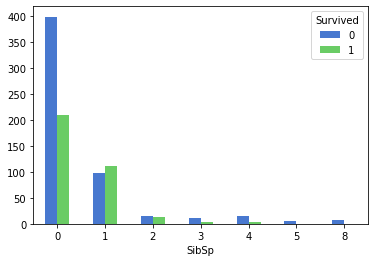

In [13]:
#--- Sobreviveu x Nº de irmãos/conjuge a bordo

treino[["SibSp", "Survived"]].reset_index().groupby(["SibSp", "Survived"], as_index = False).size().unstack().plot.bar()
plt.xticks(rotation = 0)
plt.show()

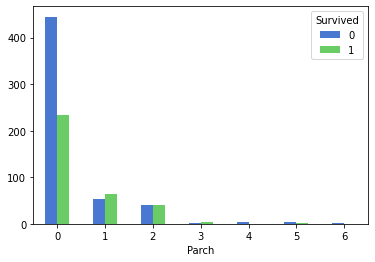

In [14]:
#--- Sobreviveu x Nº de pais/filhos a bordo

treino[["Parch", "Survived"]].reset_index().groupby(["Parch", "Survived"], as_index = False).size().unstack().plot.bar()
plt.xticks(rotation = 0)
plt.show()

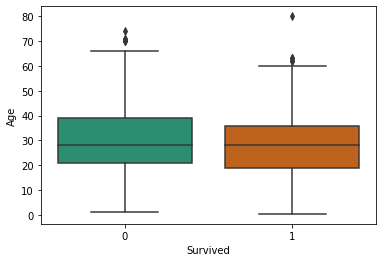

In [15]:
sns.boxplot(x = treino["Survived"], y = treino["Age"], data = treino, palette = "Dark2")

plt.show()

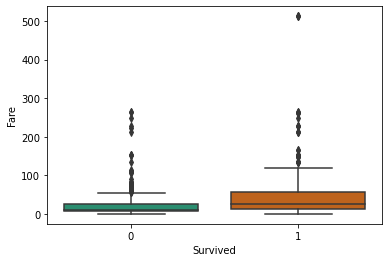

In [16]:
sns.boxplot(x = treino["Survived"], y = treino["Fare"], data = treino, palette = "Dark2")

plt.show()

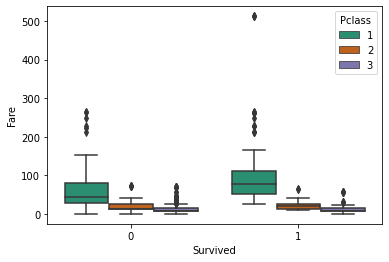

In [17]:
sns.boxplot(x = "Survived", y = "Fare", hue = "Pclass",
                 data = treino, palette = "Dark2")

plt.show()

**Próximo passo:**

1. Melhorar os gráficos
2. Transformação nas variáveis;
    - Concatenar os dados de treino e teste
    - Selecionar as variáveis que irão para o modelo
    - Log no preço da tarifa
    - OneHotEncoding